# Word Representation

### One Hot Vector를 통한 출력

In [1]:
from konlpy.tag import Mecab

qna_data = [
                ['안녕', '만나서 반가워']
                ,['넌누구니', '나는 AI 봇이란다.']
                 ,['피자 주문 할께', '음료도 주문해줘']
                ,['음료는 멀로', '콜라로 해줘']
            ]
mecab = Mecab('C:mecab/mecab-ko-dic/')

train_data = list(map(lambda x : mecab.morphs(' '.join(x)) , qna_data))

import itertools
train_data = list(itertools.chain.from_iterable(train_data))

print(list(train_data))

['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.', '피자', '주문', '할께', '음료', '도', '주문', '해', '줘', '음료', '는', '멀', '로', '콜라', '로', '해', '줘']


In [2]:
import numpy as np
bucket = np.zeros(len(train_data), dtype=np.float)

for word in train_data :
    bucket_temp = bucket.copy()
    np.put(bucket_temp, train_data.index(word), 1)
    print(bucket_temp)

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.

## Word to Vector (By Gensim)
### W2V를 통해 출력해보자

In [3]:
from gensim.models import word2vec

C:\Users\dukhyun\AppData\Local\conda\conda\envs\keras\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
train_data = [train_data]
print(train_data)

model = word2vec.Word2Vec(size=50, window=2, min_count=1)
model.build_vocab(train_data)
model.train(train_data, total_examples=len(train_data), epochs=model.iter)
print("model check : {0}".format(model))

[['안녕', '만나', '서', '반가워', '넌', '누구', '니', '나', '는', 'AI', '봇', '이', '란다', '.', '피자', '주문', '할께', '음료', '도', '주문', '해', '줘', '음료', '는', '멀', '로', '콜라', '로', '해', '줘']]
model check : Word2Vec(vocab=24, size=50, alpha=0.025)


In [5]:
import os  
file_path = './model'
if not os.path.exists(file_path):
    os.makedirs(file_path)
model.save(file_path + "/w2v.bin")
model = word2vec.Word2Vec.load("./model/w2v.bin")
print("model load check : {0}".format(model))

model load check : Word2Vec(vocab=24, size=50, alpha=0.025)


In [6]:
print(model.wv.index2word)

['해', '음료', '주문', '로', '는', '줘', '봇', '나', '.', '할께', '서', '넌', '이', '콜라', '누구', '안녕', '만나', '니', '반가워', '란다', '도', '멀', 'AI', '피자']


### 안녕, AI등 값의 Vector값 출력 

In [7]:
print(model['안녕'])

[-0.00076377 -0.00072243  0.00072298 -0.00933897 -0.00092161 -0.00358441
  0.00704134 -0.00929826  0.00524337  0.00099565  0.00632451  0.00684889
  0.00294775 -0.00685148 -0.00503678 -0.00927184  0.00702607  0.00810971
 -0.00207057  0.00362839 -0.00037941  0.00708263 -0.00485569  0.00447032
  0.00327159 -0.00693702 -0.00327973 -0.00634478 -0.00834523  0.00761413
  0.00410228 -0.00737488 -0.00454634  0.00378155 -0.00543355 -0.00182856
 -0.00921995 -0.0080345   0.0069856   0.00320357  0.00760939 -0.00456639
  0.00953818 -0.00117526  0.00020492 -0.00793064 -0.00681066 -0.00652168
 -0.00816922 -0.0059518 ]


C:\Users\dukhyun\AppData\Local\conda\conda\envs\keras\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [8]:
print(model['AI'])

[ -7.59625167e-04   1.20756113e-05   6.84602140e-03   3.37150902e-03
   9.61058031e-05  -1.35166757e-03  -5.96111221e-03   4.08429606e-03
   2.73023220e-03  -6.42878842e-03  -4.93711140e-03  -5.97386062e-03
  -8.01894721e-03   5.29127521e-03  -9.91160329e-03   4.45773872e-03
  -3.43419705e-03   9.62350331e-03  -6.83814101e-03   3.46726296e-03
   2.32990424e-04   7.79437879e-03   6.16423739e-03  -9.70173720e-03
  -6.40416890e-03  -4.29112976e-03  -5.37517900e-03   1.05641328e-03
   7.37238955e-03  -7.53135700e-03  -6.47504022e-03   1.20721152e-03
   8.61448329e-03   3.64346942e-03  -7.14990124e-03   1.25761342e-03
   3.31146456e-03  -4.91916947e-03   4.63745976e-03   1.29360741e-03
   9.17758141e-03   2.30362662e-03   3.06263356e-03  -3.10512027e-03
   9.50490870e-03  -8.98309238e-03  -3.81899043e-03  -2.79643992e-03
  -1.52790220e-03   6.09226059e-03]


C:\Users\dukhyun\AppData\Local\conda\conda\envs\keras\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [9]:
result1 = model.most_similar(positive='누구', negative='', topn=10)
print(result1)

[('도', 0.20897173881530762), ('니', 0.12344488501548767), ('콜라', 0.10104541480541229), ('반가워', 0.09028489142656326), ('AI', 0.08066551387310028), ('로', 0.06683259457349777), ('넌', 0.06471765041351318), ('.', 0.043295957148075104), ('안녕', 0.015999503433704376), ('서', 0.01574017107486725)]


C:\Users\dukhyun\AppData\Local\conda\conda\envs\keras\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


C:\Users\dukhyun\AppData\Local\conda\conda\envs\keras\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


            x          y word
0  -49.343960  67.144615    해
1   46.881290 -35.151985   음료
2    3.022876  35.138615   주문
3  -79.044189  44.918388    로
4    1.555441   4.801738    는
5  -81.629478 -24.365961    줘
6   46.051685  45.205349    봇
7  -54.083908 -57.479698    나
8  -50.165989 -25.285740    .
9  -14.144782  77.785507   할께
10  16.743690 -53.199738    서
11   2.628964 -25.832468    넌
12 -23.071894 -40.468586    이
13  16.477610  63.391682   콜라
14  27.626026  20.089365   누구
15 -23.509703  18.263872   안녕
16 -14.381277 -70.128090   만나
17 -22.475058  47.729908    니
18 -81.504097  10.216122  반가워
19 -23.480272 -10.354271   란다
20 -50.811890   3.662765    도
21  27.490499 -10.789469    멀
22 -49.641659  32.728233   AI
23  57.506779   4.994476   피자


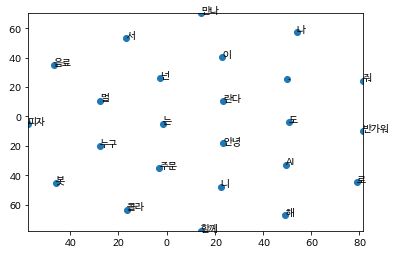

In [10]:
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt


font_name = matplotlib.font_manager.FontProperties(
    fname='C:\Windows\Fonts\\NanumBarunGothicLight.ttf'
).get_name()
vocab = model.wv.index2word
X = model[vocab]
matplotlib.rc('font', family=font_name)
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) #t-분포 확률적 임베딩(t-SNE)은 데이터의 차원 축소에 사용
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
print(df)
ax.scatter(df['x'], df['y'])
ax.set_xlim(df['x'].max(), df['x'].min())
ax.set_ylim(df['y'].max(), df['y'].min())
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))
plt.show()